In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from models.gpt_model import GPTModel
from models.zeroshot_models import BartModel_withDescription
from models.zeroshot_models import BartModel_withParaphrasing
from models.zeroshot_models import DistilBertModel
from models.zeroshot_models import DistilBertModel_withParaphrasing
from models.zeroshot_models import MDeBertaModel
from models.zeroshot_models import MDeBertaModel_withParaphrasing
from models.zeroshot_models import MDeBertaModelMulti
from models.zeroshot_models import MDeBertaModelMulti_withParaphrasing
from models.tfidf_models import SVCModel
from models.tfidf_models import LogisticRegressionModel
from models.tfidf_models import RandomForestModel
from models.tfidf_models import KNNModel
from models.embeddings_models import SVCModel as SVCModelEmbeddings
from models.finetuning_models import FineTunedModel
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, fbeta_score


In [ ]:
test_data = pd.read_csv('data/test_data.csv' , sep=';')
X_test = test_data['text']
y_test = test_data['label']

# Dictionnaire pour stocker les performances des différents modèles
model_performance = {}

# Liste des modèles que vous avez déjà entraînés
models = {
    "GPTModel": GPTModel(),
    "BartModel_withDescription": BartModel_withDescription(),
    "BartModel_withParaphrasing": BartModel_withParaphrasing(),
    "DistilBertModel" : DistilBertModel(),
    "DistilBertModel_withParaphrasing" : DistilBertModel_withParaphrasing(),
    "MDeBertaModel" : MDeBertaModel(),
    "MDeBertaModel_withParaphrasing" : MDeBertaModel_withParaphrasing(),
    "MDeBertaModelMulti" : MDeBertaModelMulti(),
    "MDeBertaModelMulti_withParaphrasing" : MDeBertaModelMulti_withParaphrasing(),
    "SVCModel" : SVCModel(),
    "LogisticRegressionModel" : LogisticRegressionModel(),
    "RandomForestModel" : RandomForestModel(),
    "KNNModel" : KNNModel(),
    "SVCModelEmbeddings" : SVCModelEmbeddings(),
    "FineTunedModel" : FineTunedModel()

}

In [ ]:

def evaluate_model_performance(model, X_test, y_test, target_class='lost_luggage'):

    # Prédictions sur les données de test
    y_pred = model.predict(list(X_test))
    print(y_pred)
    
    # Évaluation générale
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Calcul de la matrice de confusion complète
    labels = test_data['label'].unique()
    conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
    target_index = list(labels).index(target_class)
    
    # Précision pour `lost_luggage`
    # Précision = TP / (TP + FP)
    tp = conf_matrix[target_index, target_index]
    fp = conf_matrix[:, target_index].sum() - tp
    precision_lost_luggage = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Spécificité pour `lost_luggage`
    # Spécificité = TN / (TN + FP)
    tn = conf_matrix.sum() - (conf_matrix[target_index, :].sum() + conf_matrix[:, target_index].sum() - tp)
    specificity_lost_luggage = tn / (tn + fp) if (tn + fp) > 0 else 0


    # Évaluation pondérée
    f2_score_lost_luggage = fbeta_score(y_test, y_pred, beta=2, average='macro')
    
    # Résultats
    results = {
        "Overall Accuracy": accuracy,
        "F1 Score (Macro)": f1_macro,
        "Precision for lost_luggage": precision_lost_luggage,
        "Specificity for lost_luggage": specificity_lost_luggage,
        "F2 Score for lost_luggage": f2_score_lost_luggage,
    }
    
    return results

# Exécuter le pipeline de test pour chaque modèle
for model_name, model in models.items():
    print(f"Évaluation du modèle : {model_name}")
    performance = evaluate_model_performance(model, X_test, y_test)
    model_performance[model_name] = performance

# créer un DataFrame à partir des performances des modèles

model_performance_df = pd.DataFrame(model_performance).T
model_performance_df

Évaluation du modèle : FineTunedModel
['lost_luggage', 'carry_on', 'book_hotel', 'travel_alert', 'book_hotel', 'book_flight', 'flight_status', 'translate', 'lost_luggage', 'travel_alert', 'travel_alert', 'travel_suggestion', 'book_hotel', 'carry_on', 'book_hotel', 'translate', 'travel_suggestion', 'out_of_scope', 'lost_luggage', 'flight_status', 'lost_luggage', 'travel_suggestion', 'flight_status', 'translate', 'book_flight', 'book_hotel', 'out_of_scope', 'travel_alert', 'book_flight', 'travel_suggestion', 'translate', 'lost_luggage', 'book_flight', 'flight_status', 'book_flight', 'translate', 'translate', 'travel_suggestion', 'book_flight', 'lost_luggage', 'carry_on', 'book_hotel', 'book_hotel', 'book_hotel', 'travel_suggestion', 'out_of_scope', 'flight_status', 'travel_alert', 'book_hotel', 'carry_on', 'book_hotel', 'travel_alert', 'travel_alert', 'book_hotel', 'book_hotel', 'out_of_scope', 'flight_status', 'lost_luggage', 'carry_on', 'lost_luggage', 'carry_on', 'lost_luggage', 'lost

,Overall Accuracy,F1 Score (Macro),Precision for lost_luggage,Specificity for lost_luggage,F2 Score for lost_luggage
FineTunedModel,0.961905,0.958871,1.0,1.0,0.958561


performances ameliorée : embeddings + classification

de meme si on utilise random forest, logistic regrssion, xgboost


fine tuning, very good results, very close to embeddings + classifier

tfidf : 9s presque

camembert embeddings : 38s


gpt : 55s

In [6]:
# sauvegarder les performances des modèles
model_performance_df.to_csv('test_results/models_performance_FineTuning.csv')

# Overall comparaison

In [7]:
df1 = pd.read_csv('test_results/models_performance_GPTModel.csv')
df2 = pd.read_csv('test_results/models_performance_ZeroShotClassification.csv')
df3 = pd.read_csv('test_results/models_performance_Tf-Idf.csv')
df4 = pd.read_csv('test_results/models_performance_Embeddings.csv')
df5 = pd.read_csv('test_results/models_performance_FineTuning.csv')

In [9]:
df_concat = pd.concat([df1, df2, df3, df4, df5])

#calculer pour chaque modele le score :  (F1_Score + (Precision for lost_luggage + Specificity for lost_luggage)/2 )/2
df_concat['final'] = (df_concat['F1 Score (Macro)'] + (df_concat['Precision for lost_luggage'] + df_concat['Specificity for lost_luggage'])/2 )/2


df_concat.to_csv('test_results/models_performance.csv')
df_concat

,Unnamed: 0,Overall Accuracy,F1 Score (Macro),Precision for lost_luggage,Specificity for lost_luggage,F2 Score for lost_luggage,final
0,GPTModel,0.949206,0.948734,1.000000,1.000000,0.946055,0.974367
0,BartModel_withDescription,0.393651,0.354491,0.500000,0.947368,0.367099,0.539087
1,BartModel_withParaphrasing,0.403175,0.411485,0.710526,0.961404,0.399155,0.623725
2,DistilBertModel,0.238095,0.212469,0.295455,0.891228,0.221890,0.402905
3,DistilBertModel_withParaphrasing,0.228571,0.212786,1.000000,1.000000,0.200294,0.606393
4,MDeBertaModel,0.450794,0.411521,0.621622,0.950877,0.416775,0.598885
5,MDeBertaModel_withParaphrasing,0.485714,0.451625,1.000000,1.000000,0.442141,0.725813
6,MDeBertaModelMulti,0.250794,0.182595,0.295082,0.849123,0.207700,0.377349
7,MDeBertaModelMulti_withParaphrasing,0.323810,0.274355,1.000000,1.000000,0.276758,0.637178
0,SVCModel,0.971429,0.969970,1.000000,1.000000,0.969864,0.984985


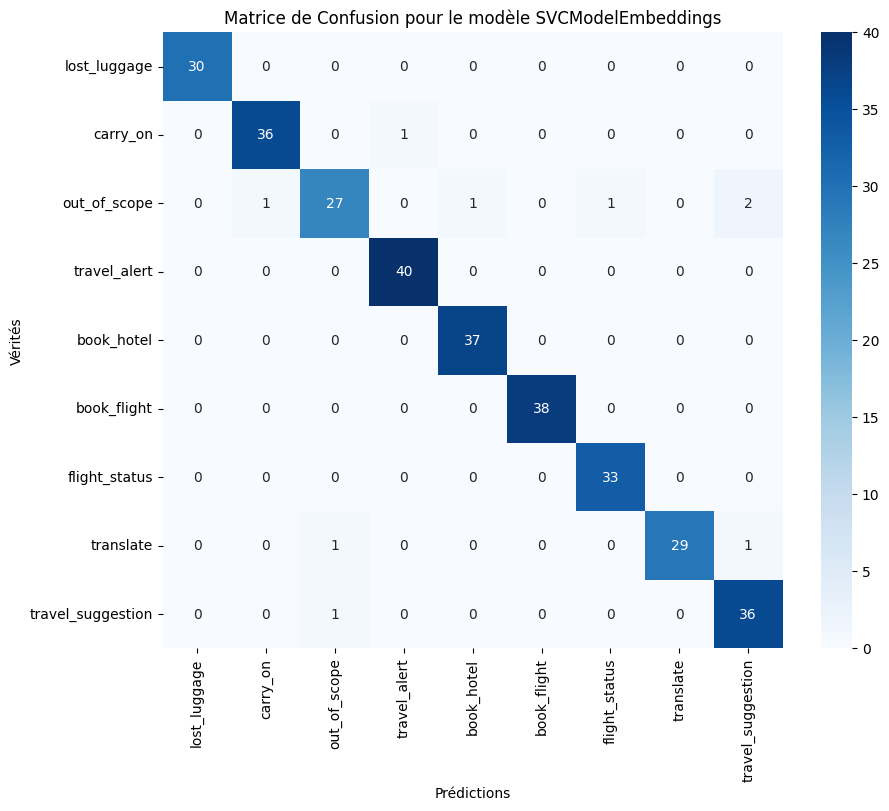

In [5]:
# Matrice de confusion pour le modèle avec la meilleure performance
best_model_name="SVCModelEmbeddings"
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best, labels=test_data['label'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data['label'].unique(), yticklabels=test_data['label'].unique())
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title(f"Matrice de Confusion pour le modèle {best_model_name}")
plt.show()